<a href="https://colab.research.google.com/github/Ajied21/My-Project-and-Training-with-SQL/blob/main/ID_X_Partners_Data_Scientist_Virtual_Internship_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

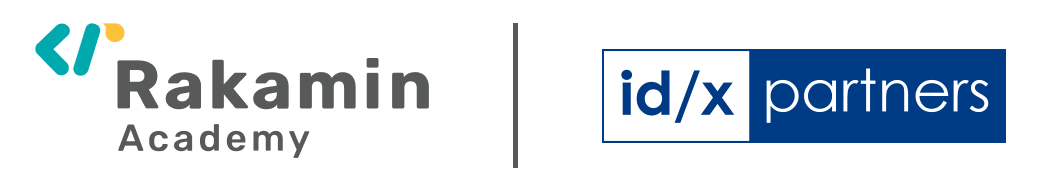

# **Rakamin x ID/X Partners (Credit Loan Prediction)**

## **Introduction**

Welcome...!!!

My name is Dhoifullah Luth Majied

This my project is the final project for the Data Scientist intern at ID/X Partners, this project data come from a Lending club. In this project, I have to build a model that can predict credit risk using a dataset provided by the company which consists of data on received and rejected loans.

**Problem** : We are investors in P2P platforms. There are loans that get charged off in the end. If a loan get charged off or defaulted, we will lost our money. We want to prevent that, and minimize our loss.

**Solution** : We will create a machine learning model that can identify if a loan is potentially bad / risky loan. It can be used as an investment decision tools. For the model, we're gonna use some non-parametrical algorithm (with little assumption) because we are not statistician, and statistics is hard. If our model is reliable, our investment in risky loans will decrease, our loss can be minimized and our net profit margin should increase.

The data we used is based on a private dataset owned by: Lending club credit loan data between 2007 - 2014 and provided by Rakamin and ID/X Partners

## **Import Module**

In [1]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
np.set_printoptions(threshold=sys.maxsize)

## **Extract Dataset**

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
loan = pd.read_csv('/content/drive/MyDrive/data csv/loan_data_2007_2014.csv', low_memory=False)
loan.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Data Understanding**

In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## **Data Cleaning**

look total of missing value each columns

In [4]:
loan.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

As we can see, total all columns and status data for object null before remove

In [5]:
print('Total Missing Values : ',loan.isnull().sum().sum(),'\n')
print('Check Status Missing Values :',loan.isnull().sum().any())

Total Missing Values :  9776224 

Check Status Missing Values : True


I used percentage perameter to check missing value and check percentage null values in each columns dataframe

In [6]:
colnames = loan.iloc[:,:]

NA = []

for cols in colnames:
    
    NA.append(round((loan[cols].isna().sum() / loan.shape[0]) * 100, 2))
    
NA = pd.DataFrame(NA, index = [colnames], columns = ['Percent %']).reset_index()

In [7]:
NA

,level_0,Percent %
0,Unnamed: 0,0.00
1,id,0.00
2,member_id,0.00
3,loan_amnt,0.00
4,funded_amnt,0.00
5,funded_amnt_inv,0.00
6,term,0.00
7,int_rate,0.00
8,installment,0.00
9,grade,0.00


filter columns which has contains > 15% null values to delete column

In [8]:
del_cols = NA[NA['Percent %'] > 15]['level_0']
del_cols = list(del_cols) + ['member_id', 'id', 'Unnamed: 0']

del_cols

['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'member_id',
 'id',
 'Unnamed: 0']

Drop/remove missing value

In [9]:
loan.drop(columns = del_cols, axis = 1, inplace = True)

Check dimensions dataset after remove an columns

In [10]:
loan.shape

(466285, 47)

check again columns was NAN/Null

In [11]:
loans = loan.copy()

loans.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     27588
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                            20
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                   

drop/remove NAN/Null each columns

In [12]:
loans.dropna(inplace=True)

As we can see, total all columns and status data for object null after remove 

In [13]:
print('Total Missing Values : ',loans.isnull().sum().sum(),'\n')
print('Check Status Missing Values :',loans.isnull().sum().any())

Total Missing Values :  0 

Check Status Missing Values : False


Create new index or reset index

In [14]:
loans.reset_index(drop=True)
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-04,3.0,9.0,0.0,7963,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,Sep-15,0.0,1,INDIVIDUAL,0.0
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-05,1.0,7.0,0.0,17726,85.6,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,Jan-16,170.08,Jan-16,0.0,1,INDIVIDUAL,0.0


remove data duplicate

In [15]:
loans.drop_duplicates(inplace=True)

## **Feature Engineering**

distribution dataset

In [16]:
loans.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq
count,437710.000000,437710.000000,437710.000000,437710.000000,437710.000000,4.377100e+05,437710.000000,437710.000000,437710.000000,437710.000000,437710.000000,4.377100e+05,437710.000000,437710.000000,437710.000000,437710.000000,437710.000000,437710.000000,437710.000000,437710.000000,437710.000000,437710.000000,437710.000000,437710.000000,437710.000000,437710.0,437710.000000
mean,14442.772726,14417.439800,14348.784677,13.823966,434.982309,7.412616e+04,17.216779,0.287058,0.804076,11.268893,0.153992,1.633232e+04,56.333232,25.163138,4467.610808,4465.999738,11642.198795,11571.610431,8945.956324,2610.962616,0.646361,84.633498,8.891850,3188.099861,0.009072,1.0,0.004023
std,8278.528864,8267.103404,8290.345080,4.358294,242.814867,5.517240e+04,7.813353,0.800888,1.089163,4.999563,0.502109,2.049445e+04,23.683636,11.599615,6414.243196,6412.380883,8264.870915,8252.885476,7045.064875,2490.476579,5.242148,551.423940,84.400666,5613.294321,0.108754,0.0,0.068933
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,33.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,8000.000000,8000.000000,8000.000000,10.990000,260.490000,4.550000e+04,11.392500,0.000000,0.000000,8.000000,0.000000,6.503000e+03,39.400000,17.000000,0.000000,0.000000,5636.403971,5587.447500,3775.280000,971.612500,0.000000,0.000000,0.000000,317.540000,0.000000,1.0,0.000000
50%,12375.000000,12325.000000,12175.000000,13.660000,382.990000,6.400000e+04,16.870000,0.000000,0.000000,10.000000,0.000000,1.189300e+04,57.800000,24.000000,406.845000,406.240000,9538.280000,9472.560000,6943.815000,1841.065000,0.000000,0.000000,0.000000,554.040000,0.000000,1.0,0.000000
75%,20000.000000,20000.000000,20000.000000,16.490000,569.950000,9.000000e+04,22.750000,0.000000,1.000000,14.000000,0.000000,2.048400e+04,74.900000,32.000000,7528.712500,7522.295000,15441.721595,15346.637500,12000.000000,3335.930000,0.000000,0.000000,0.000000,3376.112500,0.000000,1.0,0.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,32.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,1.0,5.000000


Show select columns type numeric 

In [17]:
loans_type_num = loans.select_dtypes(include=['int64', 'float64']).columns
loans_type_num

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq'],
      dtype='object')

Because the dataset has no labels, try to analyze loan status and determine labels. 
We see that there are two groups that are not clear and probably need to be excluded
from the analysis: “Does not meet the credit policy. Status: Charged Off” and “Does not
meet the credit policy. Status: Fully Paid.”  It is not clear why loans are given to users
that “Does not meet the credit policy” and there is not much documentation on these
categories.
 Now we need to define what is considered a “bad loan.”  For example, is a loan
payment that is 16 days overdue considered a bad loan? Such a loan does possess
more risk than a fully payed loan, but it is still in the process of collection. It makes
sense in this case to define bad loans as “Charged Off” and the population as all the
other loans that are (“fully paid”).  The rest of the categories represent loans that are in
the process of payment and it will take some time to evaluate if they are fully payed or
not. 

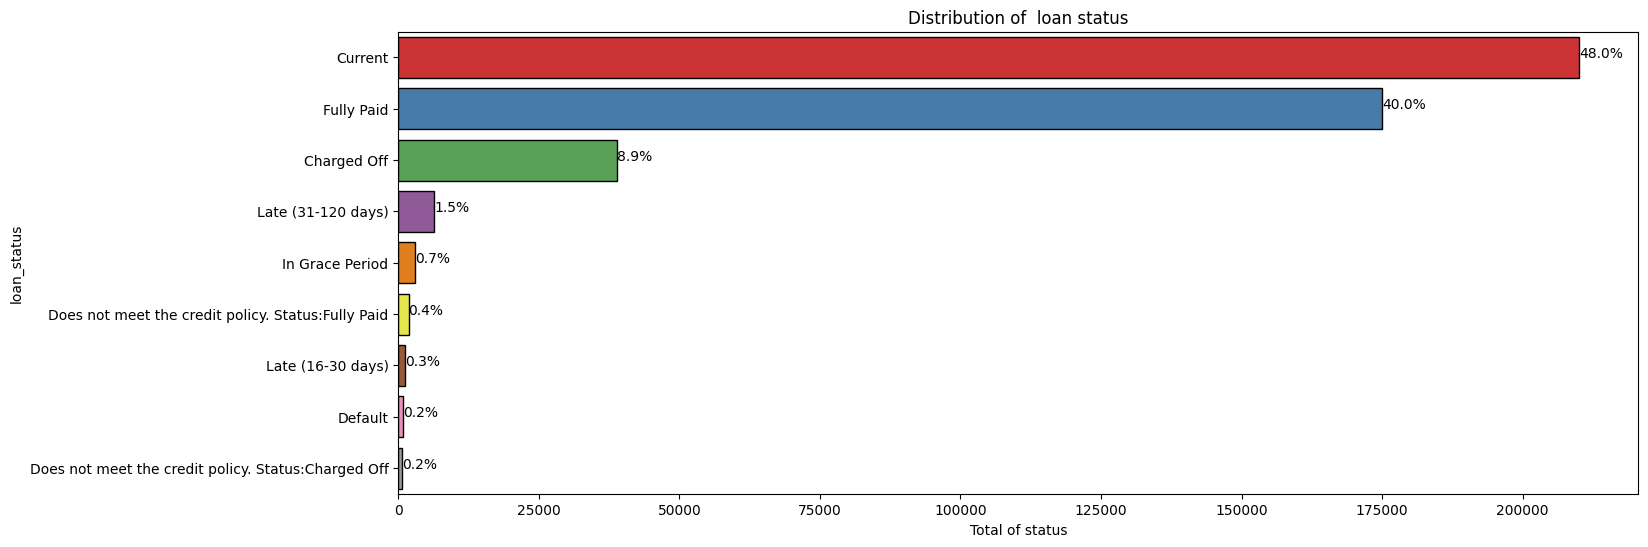

In [18]:
plt.figure(figsize = (16, 6))
ax = sns.countplot(y = 'loan_status', 
                   data = loans,
                   palette = "Set1",
                   edgecolor = "black",
                   order = loans['loan_status'].value_counts().index)
total = len(loans['loan_status'])

for status in ax.patches:
        percentage = '{:.1f}%'.format(100 * status.get_width()/total)
        x = status.get_x() + status.get_width() + 0.02
        y = status.get_y() + status.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Distribution of  loan status')
plt.xlabel('Total of status')
plt.show()

definition drop exact value from the dataset

In [19]:
def fildrop(df, col, value): 
    val = df[df[col] == value].index 
    df.drop(val, inplace = True)
    return df.reset_index(drop=True, inplace= True)

In this kernel, I will only choose Fully Paid, Default and Charged off as the loan status
Another variable like 'current' and 'Late' is a current-issued loan. This dataset is better being dropped because the status is likely to change
I also dropped 'Does not meet the credit policy', because this category does not have clear meaning and make list of variable that want to be dropped.

In [20]:
value = ['Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off',
         'In Grace Period', 'Late (31-120 days)', 'Late (16-30 days)', 'Current']

for i in value:
    fildrop(loans, 'loan_status', i)

categories the loan status to new column (default)

In [21]:
value = {'Fully Paid' :0}
loans['default'] = loans['loan_status'].map(value).fillna(1)

Check values loan_status

In [22]:
loans['loan_status'].value_counts().sort_values()

Default           776
Charged Off     38825
Fully Paid     174994
Name: loan_status, dtype: int64

The target variable is a column in the dataset that defines for what the model is trained.
In this example, we would like the model to be able to differentiate between “bad loans”
and “good loans.” We start by investigating the loan status described in the table below. 

In [23]:
good_label = ['Fully Paid'] 
bad_label = ['Charged Off', 'Default']

definition target variable for good label = 1 and bad label = 0

In [24]:
def new_Label(values):  
    if values in good_label:
        return 1
    return 0

In [25]:
loans = loans[loans['loan_status'].isin(good_label + bad_label)].copy()
loans['loan_status'] = loans['loan_status'].apply(new_Label)

## **Exploratory Data Analysis (EDA) "Numerical Data"**

Check correlation

In [26]:
loans.corr()

<ipython-input-26-f7c8d5162104>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loans.corr()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,default
loan_amnt,1.000000,0.997281,0.990696,0.214268,0.954933,0.338731,-0.070023,0.058729,0.008921,0.011738,0.196566,-0.070624,0.340037,0.102523,0.233345,0.042493,0.042493,0.842677,0.839040,0.776646,0.678446,0.050562,0.189557,0.136101,0.562297,-0.000997,NaN,0.012048,0.070023
funded_amnt,0.997281,1.000000,0.993952,0.216317,0.959063,0.337700,-0.070103,0.060817,0.009793,0.011686,0.197948,-0.069720,0.339095,0.104379,0.233232,0.042905,0.042905,0.844357,0.841208,0.778729,0.677717,0.050280,0.189990,0.136555,0.565205,-0.000607,NaN,0.012356,0.070103
funded_amnt_inv,0.990696,0.993952,1.000000,0.219540,0.952884,0.334944,-0.068668,0.066301,0.010849,0.009567,0.199302,-0.067378,0.336088,0.107469,0.233933,0.043397,0.043397,0.839516,0.846382,0.774487,0.672918,0.045122,0.189088,0.134504,0.567539,0.000234,NaN,0.012882,0.068668
int_rate,0.214268,0.216317,0.219540,1.000000,0.203614,-0.020861,-0.246022,0.170601,0.102609,0.215012,0.045848,0.086615,0.027283,0.359563,-0.006227,0.035507,0.035508,0.131057,0.134399,0.022167,0.428330,0.057563,0.187942,0.123987,0.130797,0.030486,NaN,0.032306,0.246022
installment,0.954933,0.959063,0.952884,0.203614,1.000000,0.335208,-0.051676,0.060890,0.021405,0.024922,0.194896,-0.061424,0.331121,0.133507,0.215713,0.033043,0.033043,0.822434,0.819192,0.767840,0.630787,0.056479,0.166647,0.121959,0.506033,0.000969,NaN,0.015181,0.051676
annual_inc,0.338731,0.337700,0.334944,-0.020861,0.335208,1.000000,0.061689,-0.176120,0.055735,0.063446,0.144893,-0.014869,0.321708,0.023458,0.220105,0.005166,0.005168,0.317174,0.315253,0.313675,0.189612,0.011064,0.025556,0.021630,0.231680,0.005548,NaN,0.017522,-0.061689
loan_status,-0.070023,-0.070103,-0.068668,-0.246022,-0.051676,0.061689,1.000000,-0.118204,-0.019588,-0.055206,-0.023565,-0.004812,0.003641,-0.093002,0.023421,-0.105171,-0.105168,0.349307,0.347133,0.458263,-0.046784,-0.151506,-0.466053,-0.320810,0.379035,-0.006443,NaN,-0.006415,-1.000000
dti,0.058729,0.060817,0.066301,0.170601,0.060890,-0.176120,-0.118204,1.000000,-0.001109,0.007067,0.313234,-0.036612,0.162128,0.224855,0.234519,0.020471,0.020471,0.008719,0.013802,-0.015923,0.078632,0.000852,0.059347,0.048023,0.013770,0.002667,NaN,0.009562,0.118204
delinq_2yrs,0.008921,0.009793,0.010849,0.102609,0.021405,0.055735,-0.019588,-0.001109,1.000000,0.026059,0.058559,-0.002810,-0.031537,-0.013232,0.128953,0.012755,0.012752,-0.000690,0.000191,-0.007408,0.018677,0.024499,0.018666,0.017369,0.018966,0.042272,NaN,0.109231,0.019588
inq_last_6mths,0.011738,0.011686,0.009567,0.215012,0.024922,0.063446,-0.055206,0.007067,0.026059,1.000000,0.112628,0.044874,-0.010243,-0.091586,0.141077,0.001116,0.001113,-0.005958,-0.007403,-0.023242,0.049067,0.014251,0.038842,0.025522,0.014738,0.002457,NaN,-0.002452,0.055206


Show correlation each columns with heatmap

<ipython-input-27-74fdcf77e529>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = loans.corr().nlargest(n, 'loan_status')['loan_status'].index


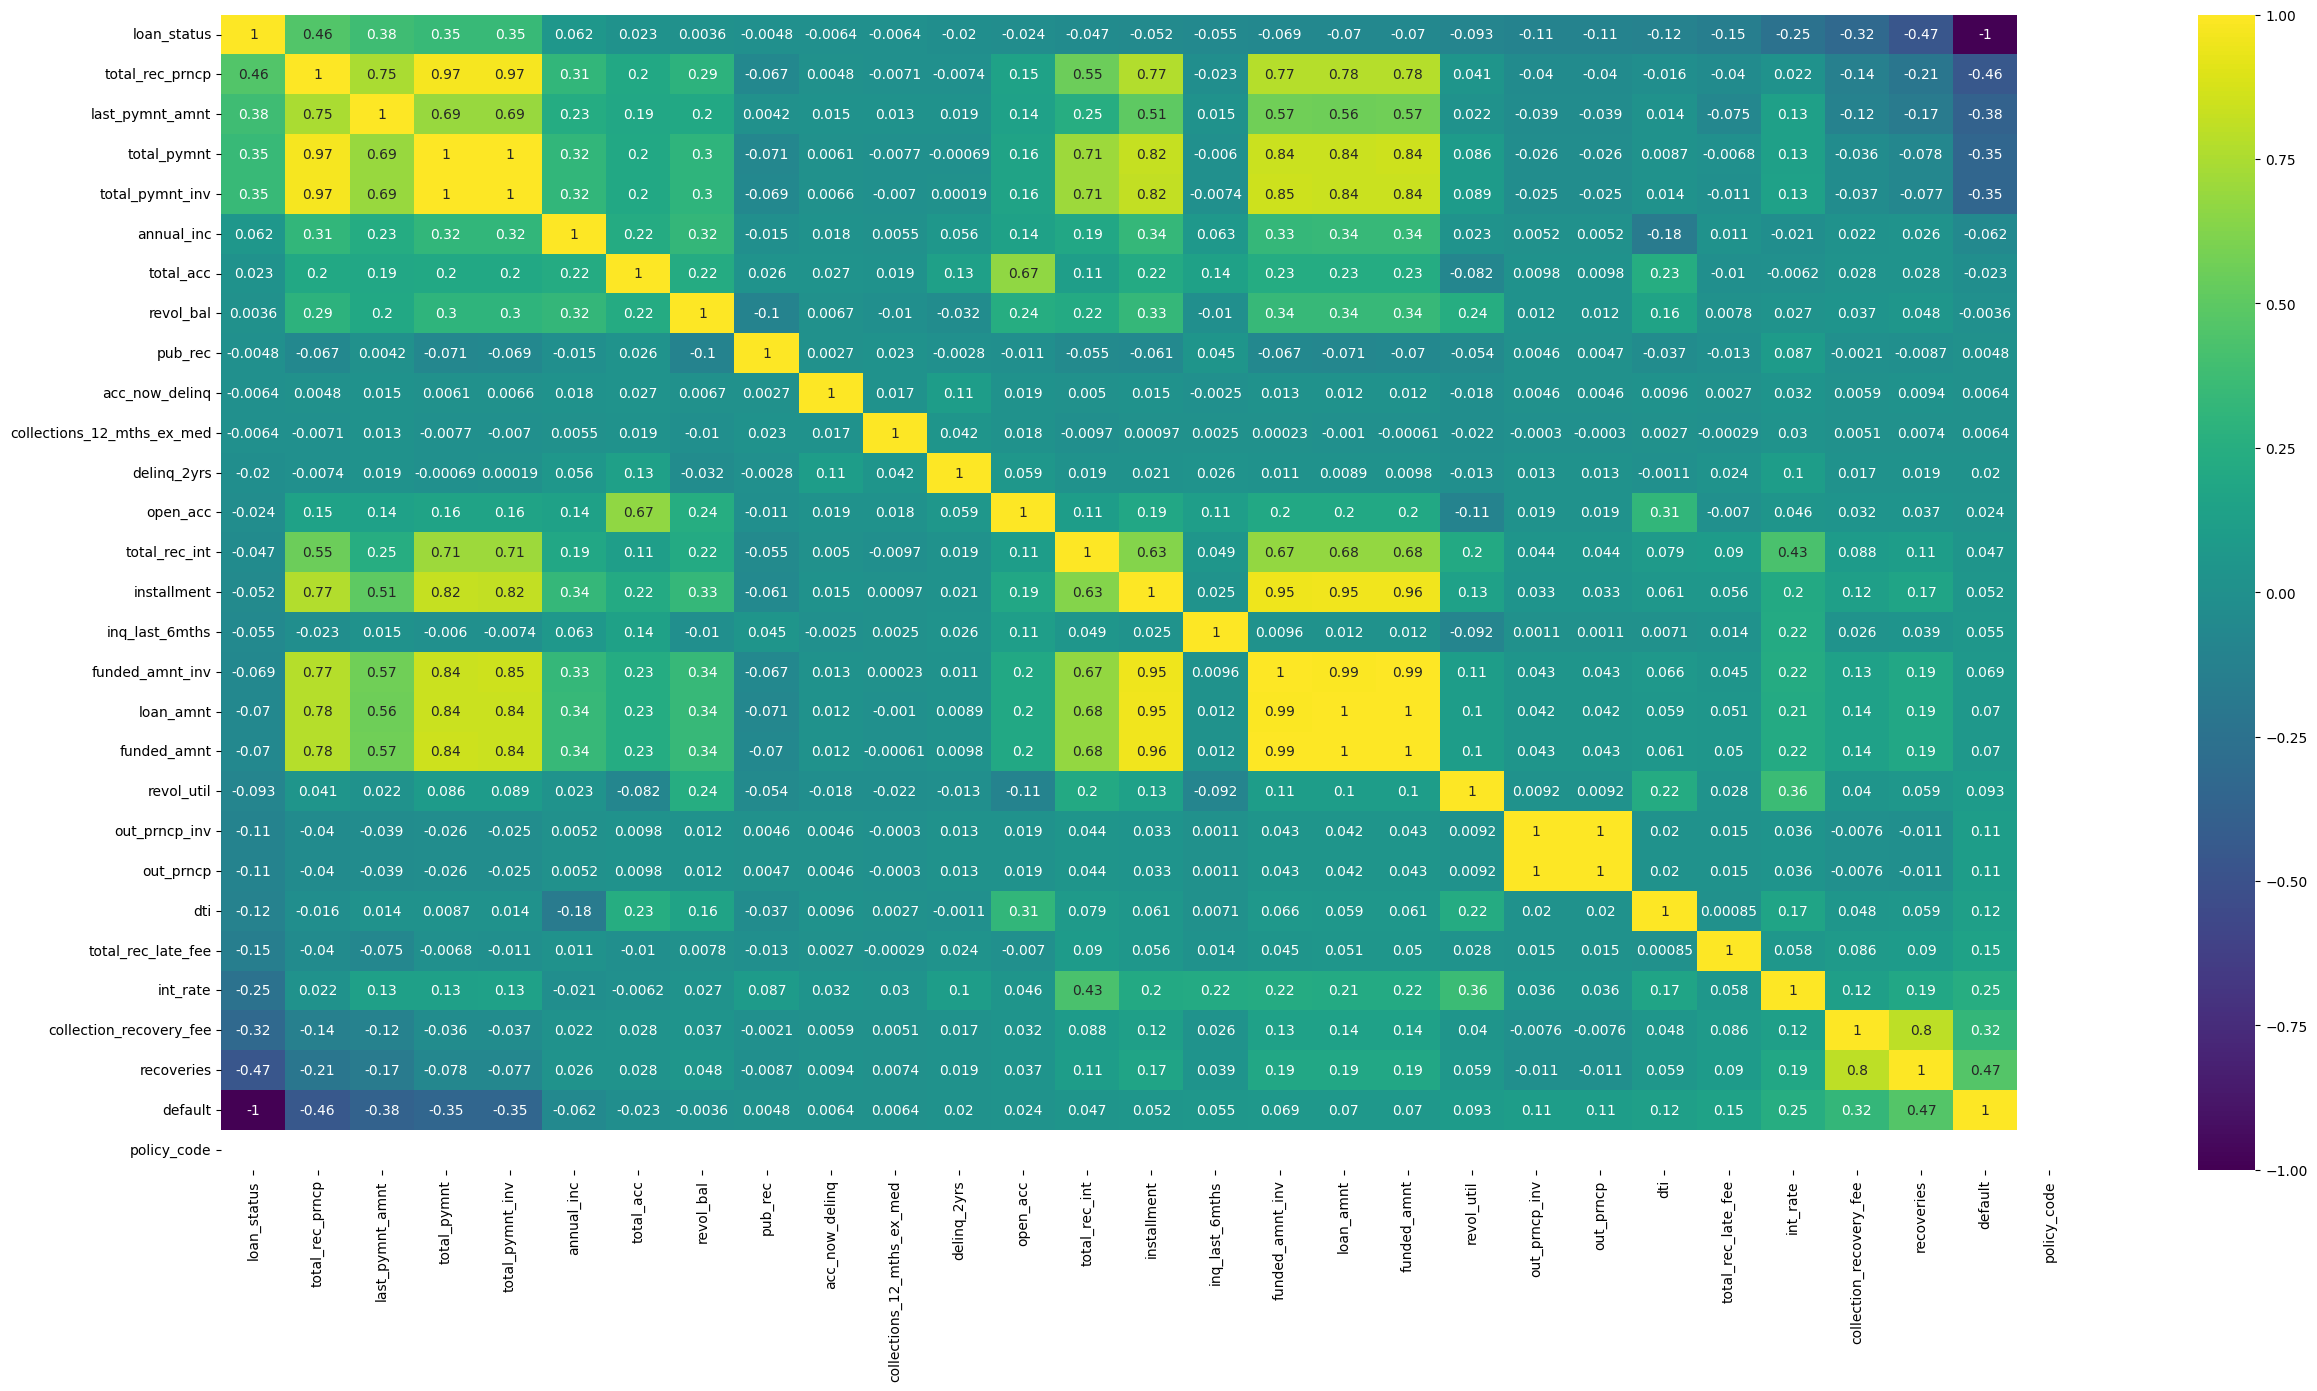

In [27]:
n = 99 #number of variables for heatmap
cols = loans.corr().nlargest(n, 'loan_status')['loan_status'].index
cor = loans[cols].corr()
plt.figure(figsize=(30,15))
sns.heatmap(cor, annot=True, cmap = 'viridis')
plt.show()

Show correlation more than equal to 7 and less than equal to 3 each columns

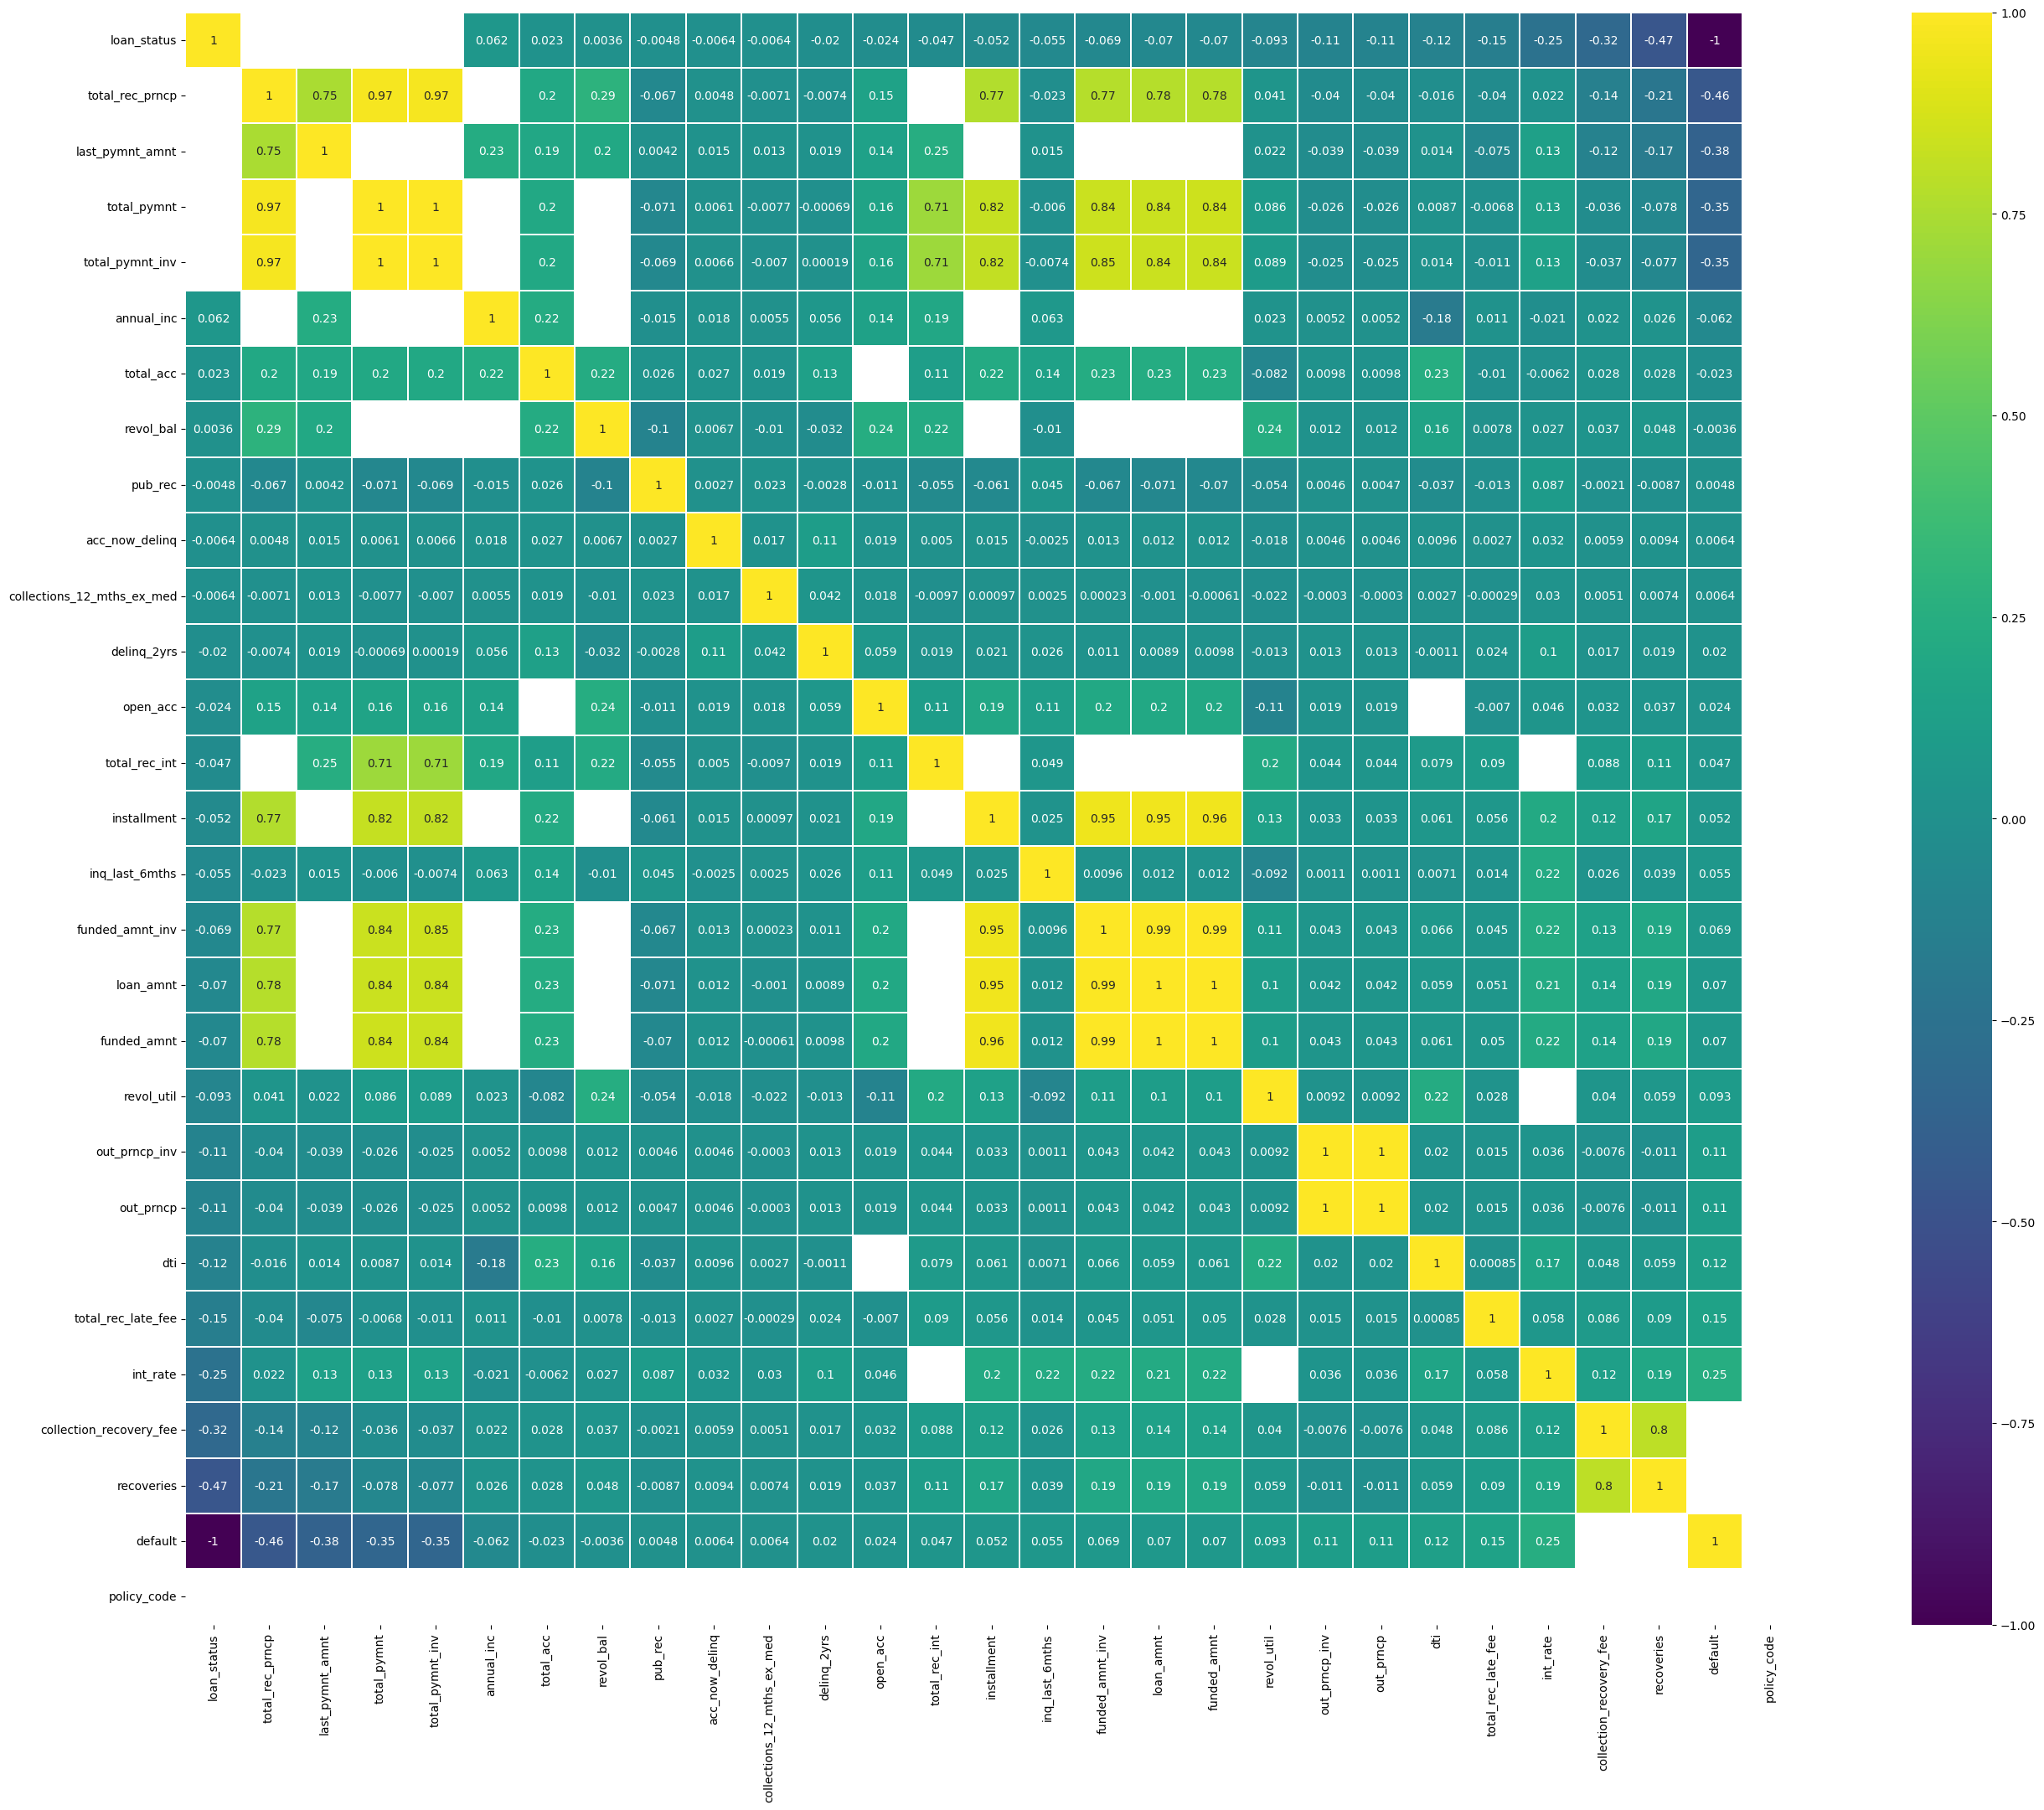

In [28]:
plt.figure(figsize=(35, 25))

sns.heatmap(cor[(cor >= 0.7) | (cor <= 0.3)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, square=True);

Create filtering correlations for different column type numeric high correlations and low correlations 

In [29]:
correlations = (loans.select_dtypes(exclude=object)
                .corr()
                .dropna(how="all", axis=0)
                .dropna(how="all", axis=1)
)

In [30]:
min_cor, max_cor = 0.1, 0.99

positive_cor = (correlations > min_cor) & (correlations < max_cor)
negative_cor = (correlations > -max_cor) & (correlations < -min_cor)
 
filter_cor = correlations[positive_cor | negative_cor]

make 2 variable feature correlations high and low

In [31]:
feature_highCor = filter_cor[(filter_cor >= 0.5) & (filter_cor <= 0.9)]
feature_lowCor = filter_cor[(filter_cor >= 0.3) & (filter_cor < 0.5)]

look names column with high correlations

In [32]:
selected_high = feature_highCor.columns[feature_highCor.notnull().any()].tolist()

print('column corr is high : ', selected_high,'\n')
print('Total column high : ', len(selected_high))

column corr is high :  ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'open_acc', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt'] 

Total column high :  13


look names column with low correlations

In [33]:
selected_low = feature_lowCor.columns[feature_lowCor.notnull().any()].tolist()

print('column corr is low : ', selected_low,'\n')
print('Total column low : ', len(selected_low))

column corr is low :  ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'default'] 

Total column low :  19


Combine high and low correlations for filtering columns type numeric using model machine learning 

In [34]:
selected_numericalfeat = set(selected_high).union(set(selected_low))
selected_numericalfeat = list(selected_numericalfeat)
selected_numericalfeat.sort()

look all names column after combine

In [35]:
print('column numerical feature : ', selected_numericalfeat,'\n')
print('Total all columns : ', len(selected_numericalfeat))

column numerical feature :  ['annual_inc', 'collection_recovery_fee', 'default', 'dti', 'funded_amnt', 'funded_amnt_inv', 'installment', 'int_rate', 'last_pymnt_amnt', 'loan_amnt', 'loan_status', 'open_acc', 'recoveries', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_prncp'] 

Total all columns :  20


# **Outlier**

In [36]:
df = loans.copy()

In [ ]:
df.drop('loan_status', inplace = True)

In [38]:
selected_numericalfeat.remove('loan_status')

Check outlier with boxplot from seaborn before drop/remove

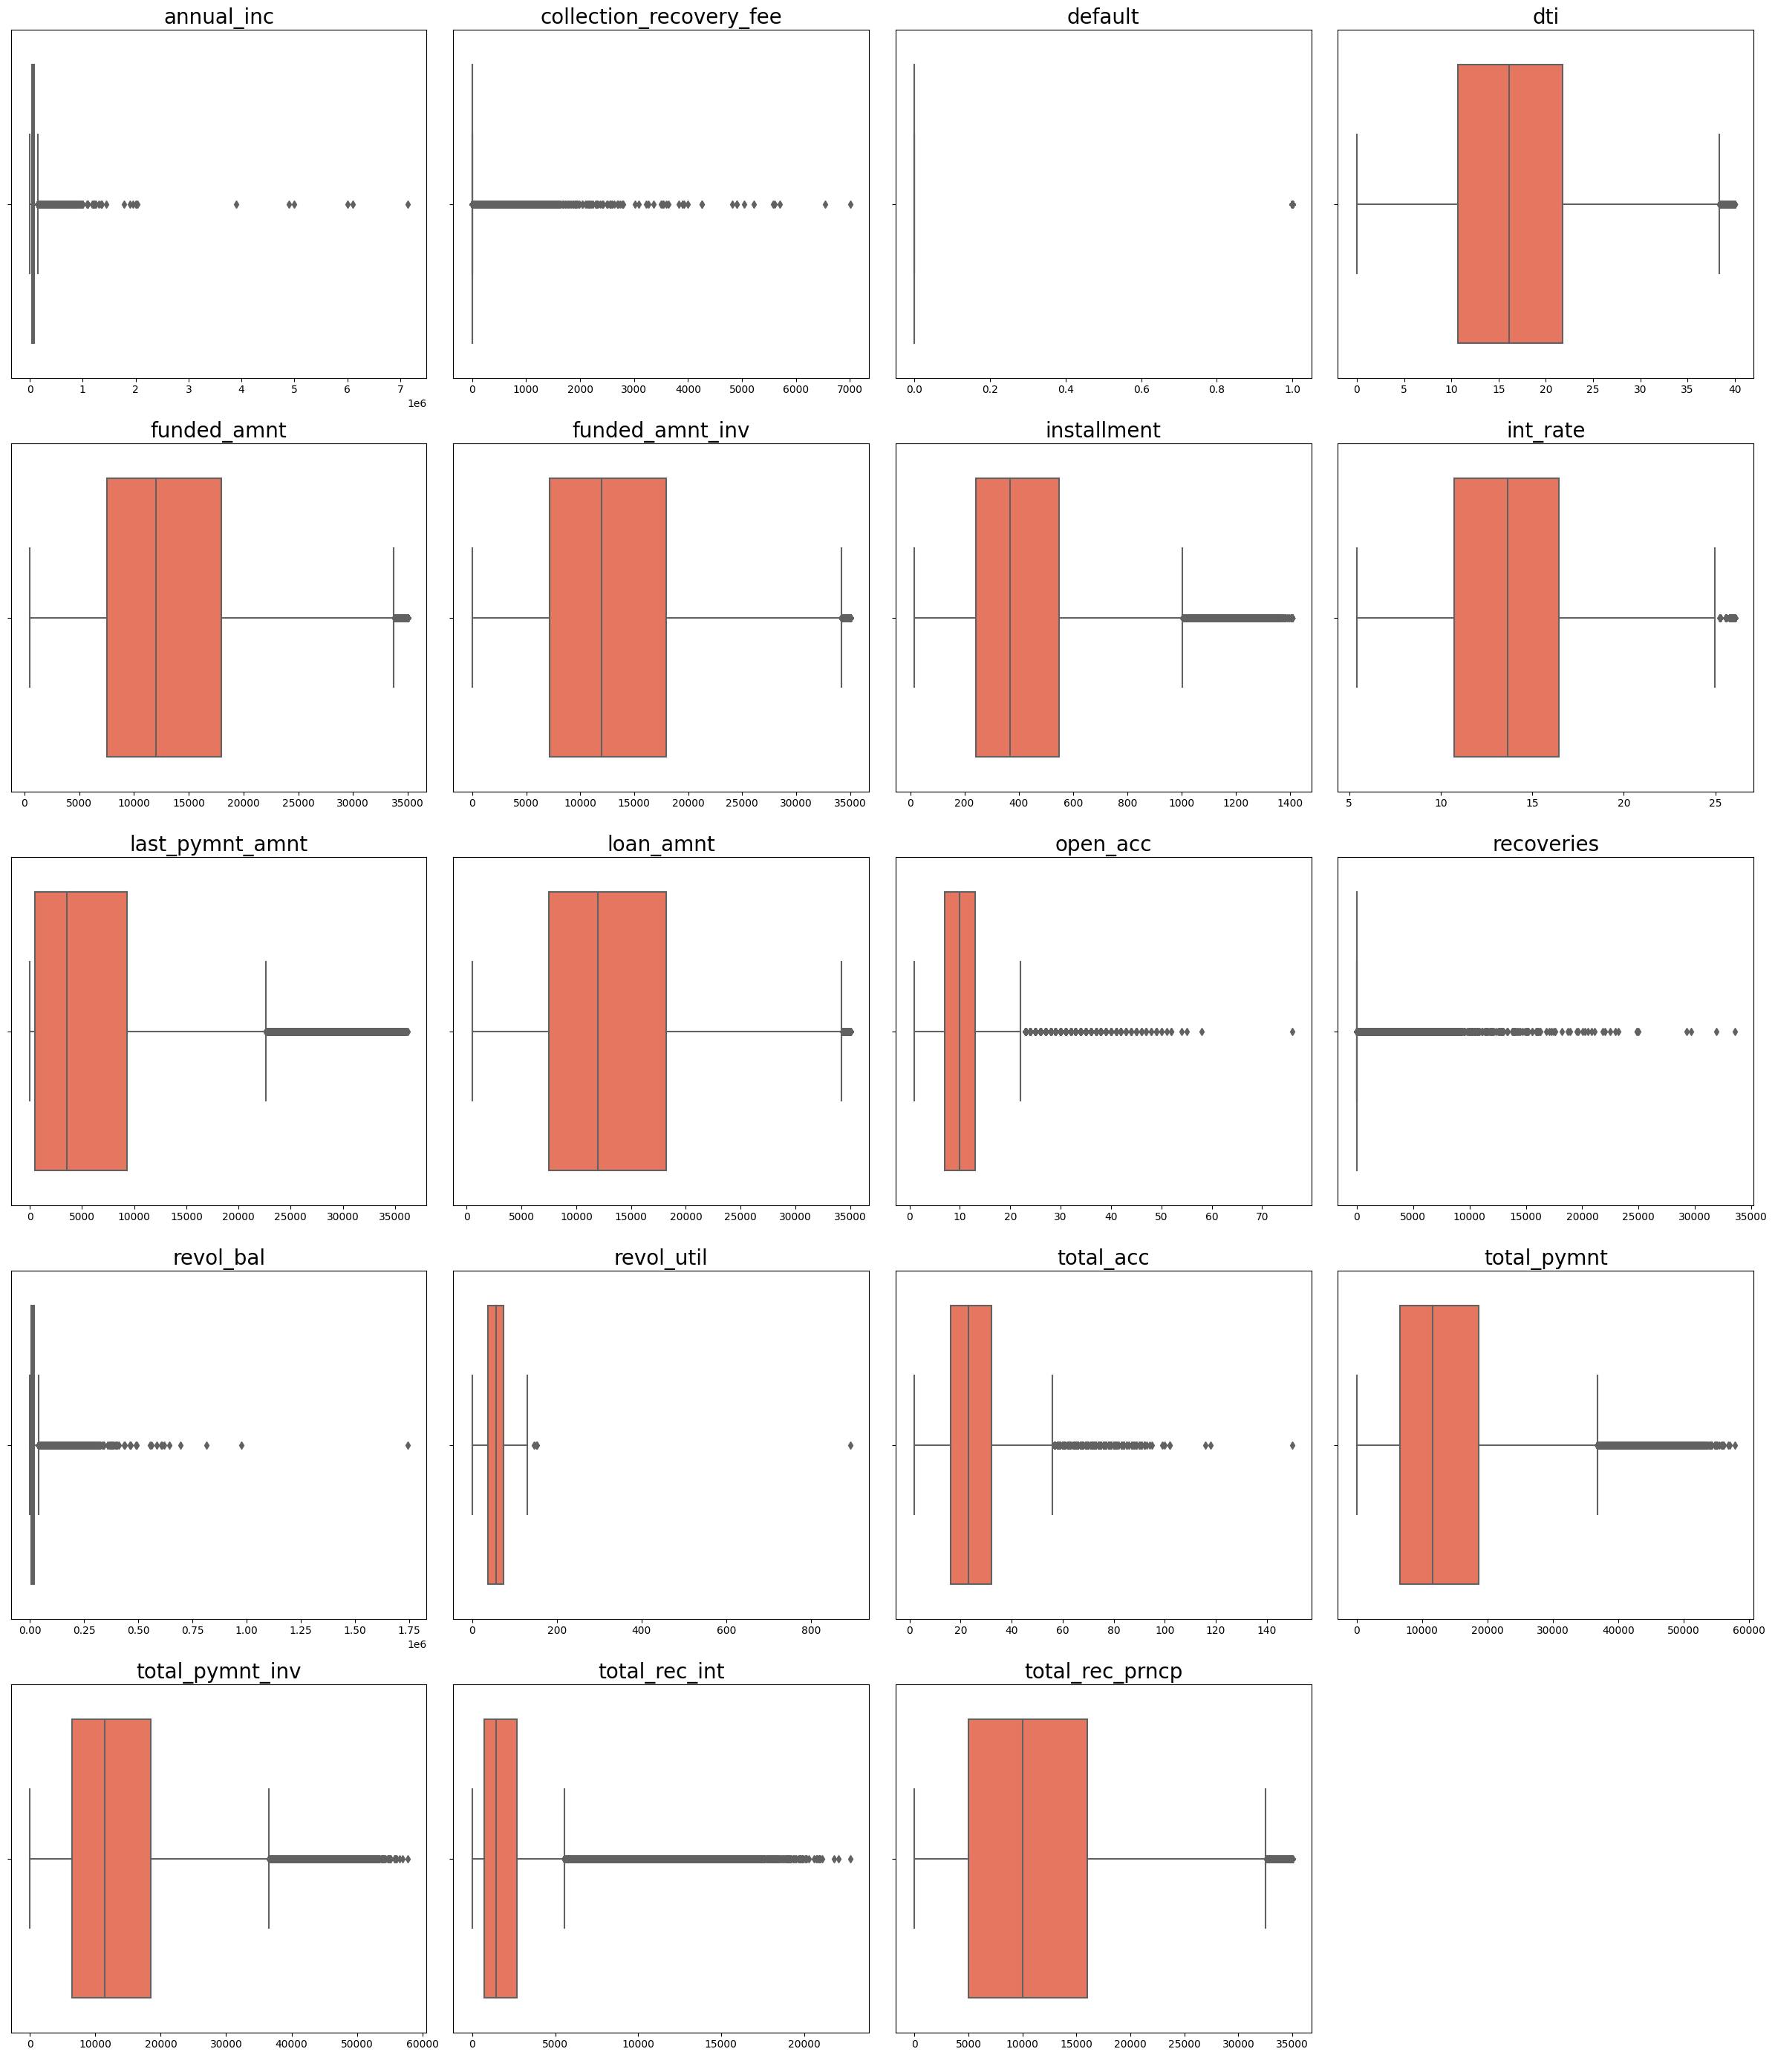

In [39]:
plt.figure(figsize=(24,28))
z = 1
for colname in selected_numericalfeat:
    plt.subplot(5, 4, z)
    sns.boxplot(x= df[list(selected_numericalfeat)][colname], palette='Reds')
    plt.title(colname, fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()
    z += 1

Drop/remove outlier with formula inter-quartile-range

In [40]:
for colnames in selected_numericalfeat:
    IQR = df[colnames].describe()[6] - df[colnames].describe()[4]
    lower_limit = df[colnames].describe()[4] - (1.5 * IQR)
    upper_limit = df[colnames].describe()[6] + (1.5 * IQR)
    
    df.loc[df[colnames] >= upper_limit, colnames] = upper_limit
    df.loc[df[colnames] <= lower_limit, colnames] = lower_limit

    df[colnames].fillna(value = df[colnames].describe()[5], inplace = True)

Check outlier with boxplot from seaborn after drop/remove

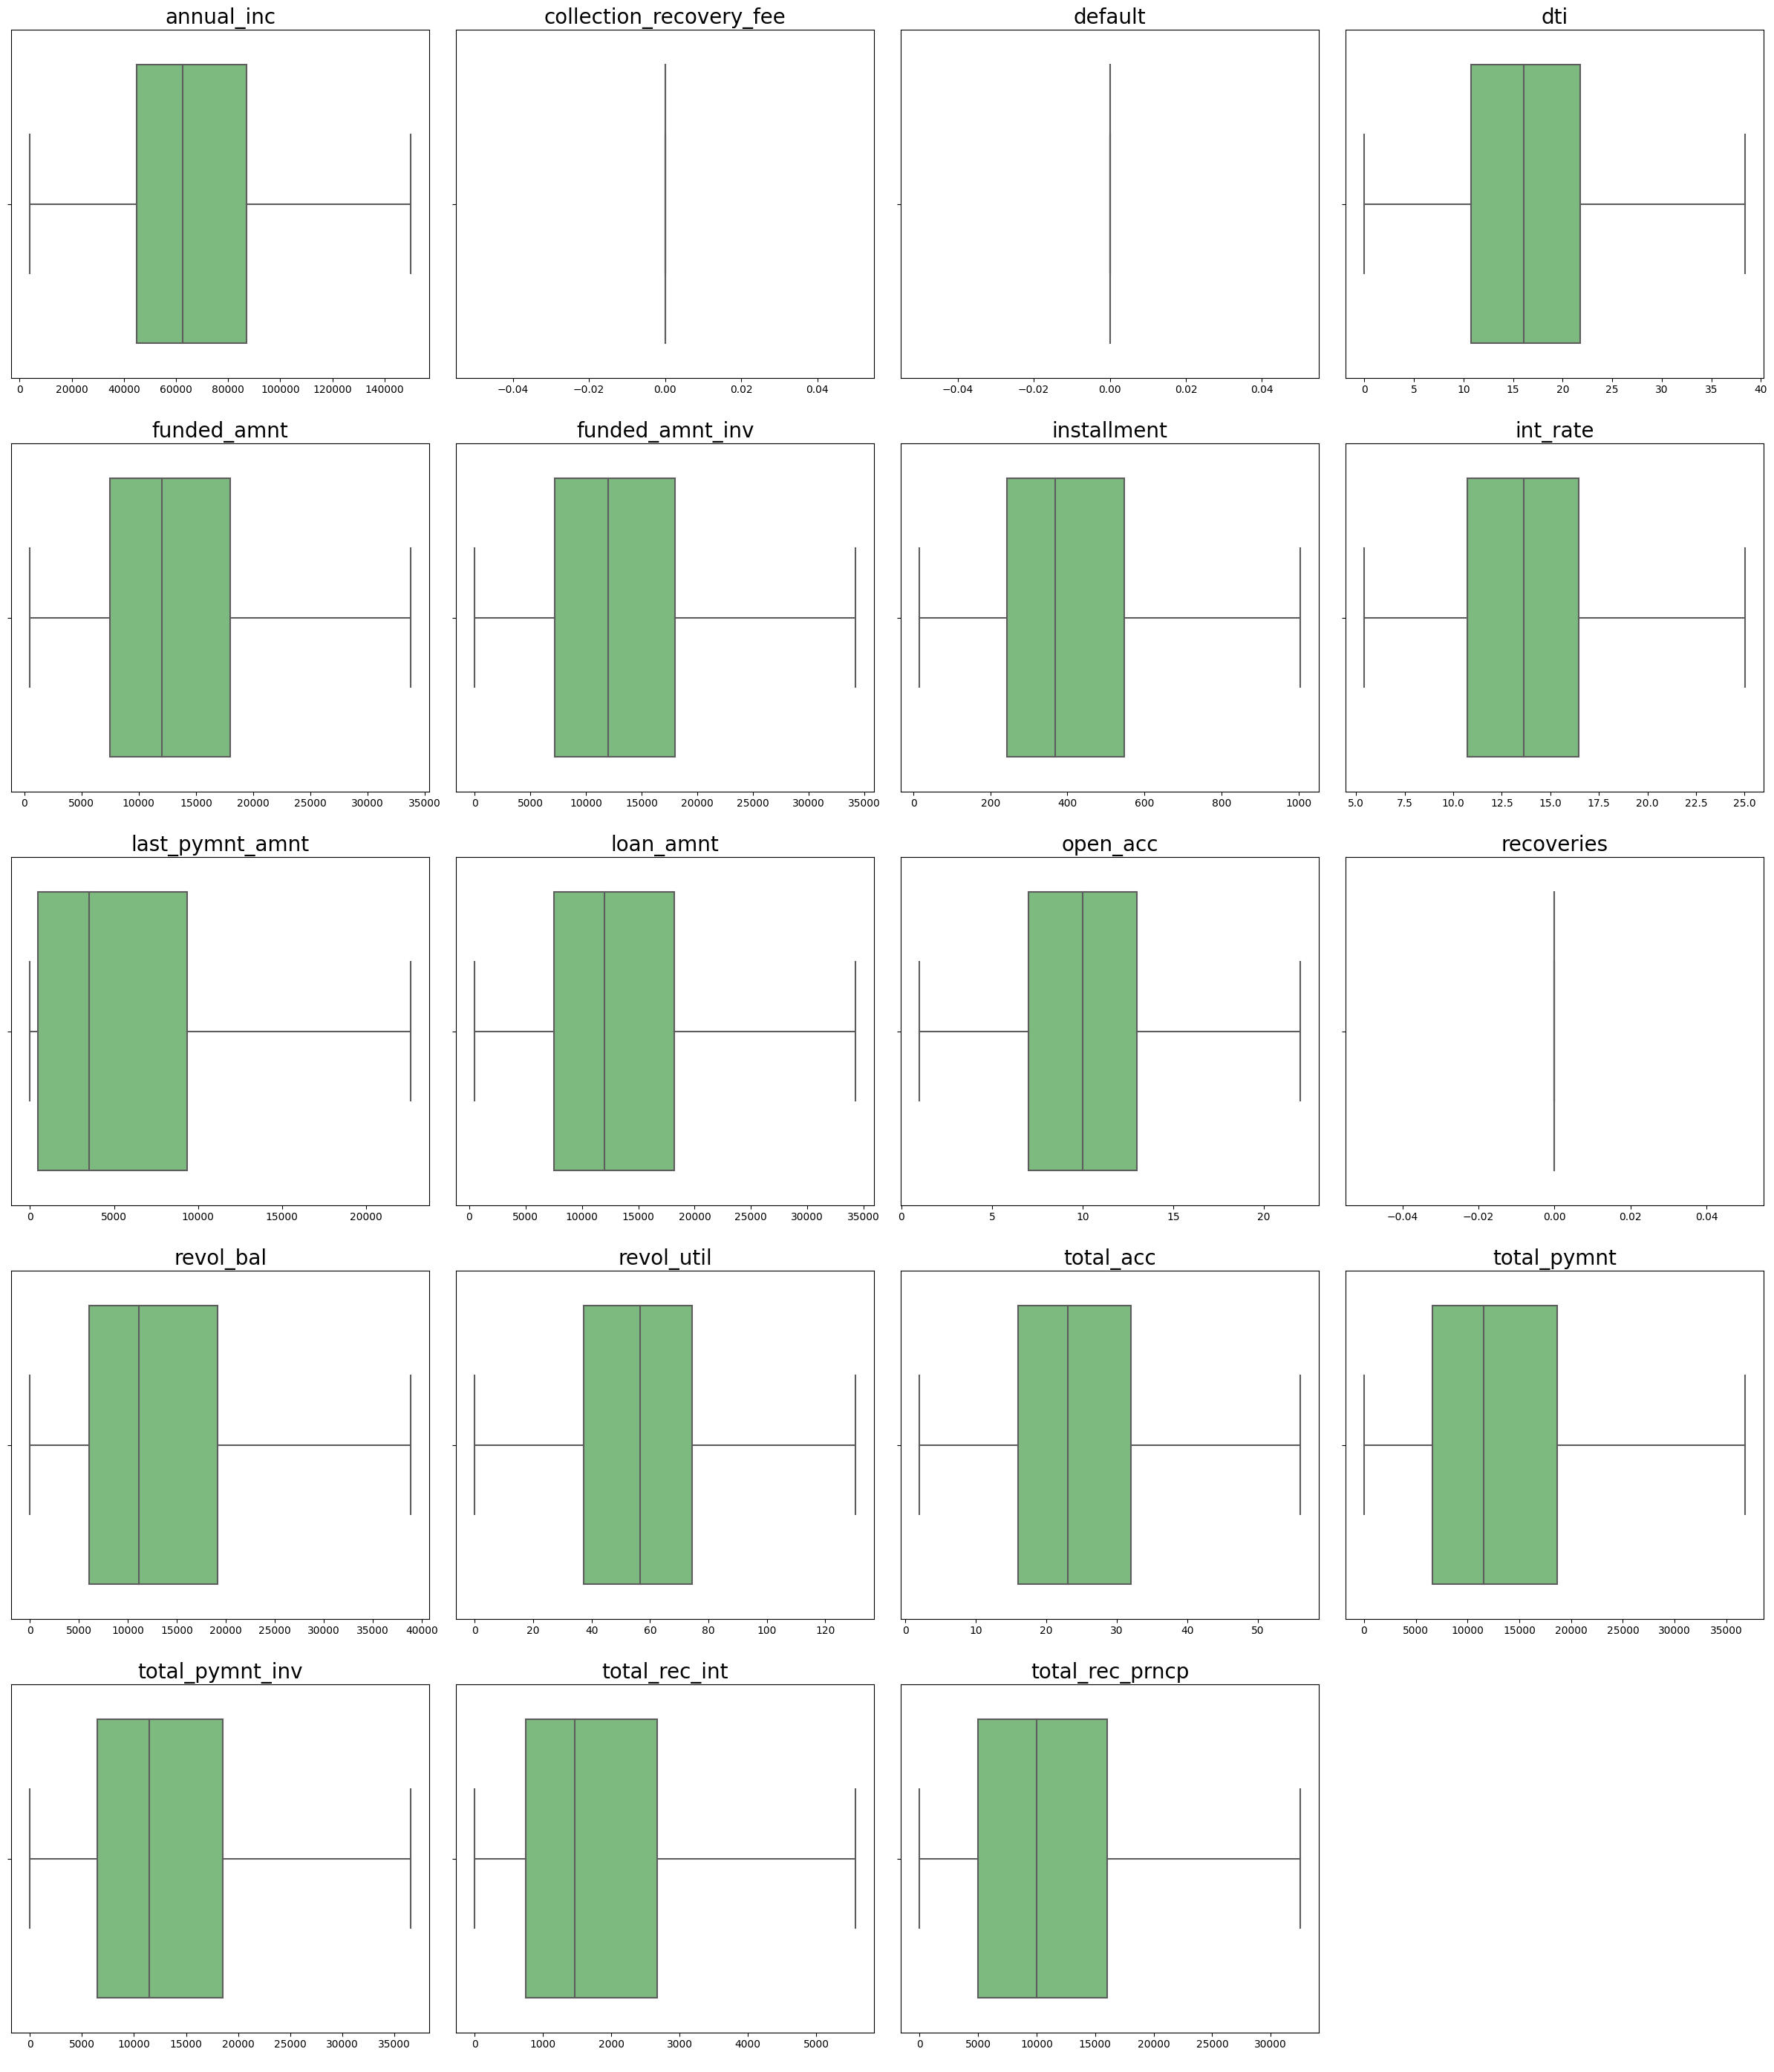

In [41]:
plt.figure(figsize=(24,28))
z = 1
for colname in selected_numericalfeat:
    plt.subplot(5, 4, z)
    sns.boxplot(x= df[list(selected_numericalfeat)][colname], palette='Greens')
    plt.title(colname, fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()
    z += 1

## **Exploratory Data Analysis (EDA) "Categorical Data"**

Select columns type Category

In [42]:
df_type_ob = df.select_dtypes(include='object').columns
df_type_ob

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

Check count value each columns type category for modeling

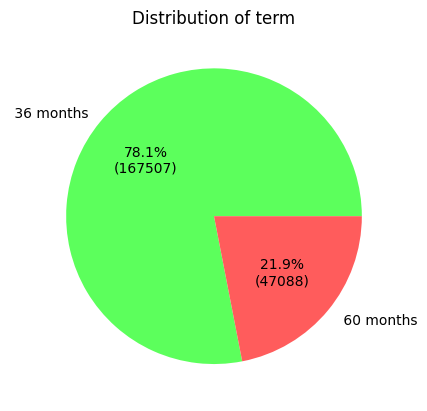

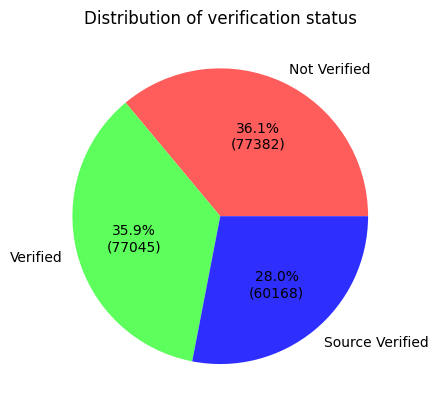

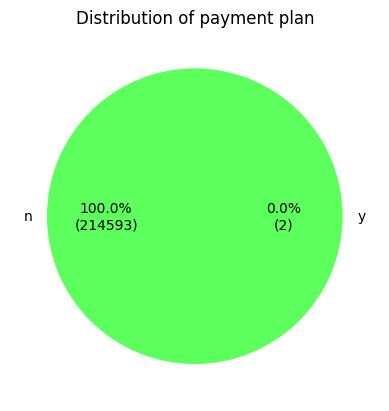

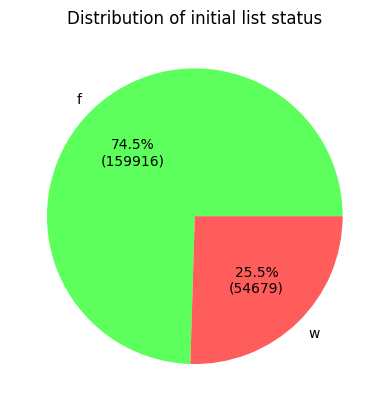

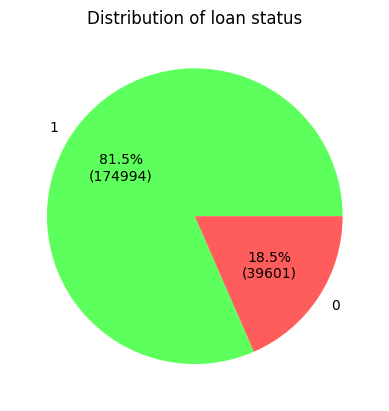

In [44]:
def format(value):
        def pie(pcts):
            totals = sum(value)
            vals = int(round(pcts*totals/100.0))
            return '{:.1f}%\n({v:d})'.format(pcts, v=vals)
        return pie

term = df['term'].value_counts()
colors = ['#5CFF5C', '#FF5C5C']
plt.pie(term,labels = term.index, colors = colors, autopct = format(term))
plt.title("Distribution of term")

plt.show()

status = df['verification_status'].value_counts()
colors = ['#FF5C5C','#5CFF5C','#2E2EFF']
plt.pie(status,labels = status.index, colors = colors, autopct = format(status))
plt.title("Distribution of verification status")

plt.show()

plan = df['pymnt_plan'].value_counts()
colors = ['#5CFF5C', '#FF5C5C']
plt.pie(plan,labels = plan.index, colors = colors, autopct = format(plan))
plt.title("Distribution of payment plan")

plt.show()

initial_list = df['initial_list_status'].value_counts()
colors = ['#5CFF5C', '#FF5C5C']
plt.pie(initial_list,labels = initial_list.index, colors = colors, autopct = format(initial_list))
plt.title("Distribution of initial list status")

plt.show()

loan_st = df['loan_status'].value_counts()
colors = ['#5CFF5C', '#FF5C5C']
plt.pie(loan_st,labels = loan_st.index, colors = colors, autopct = format(loan_st))
plt.title("Distribution of loan status")

plt.show()

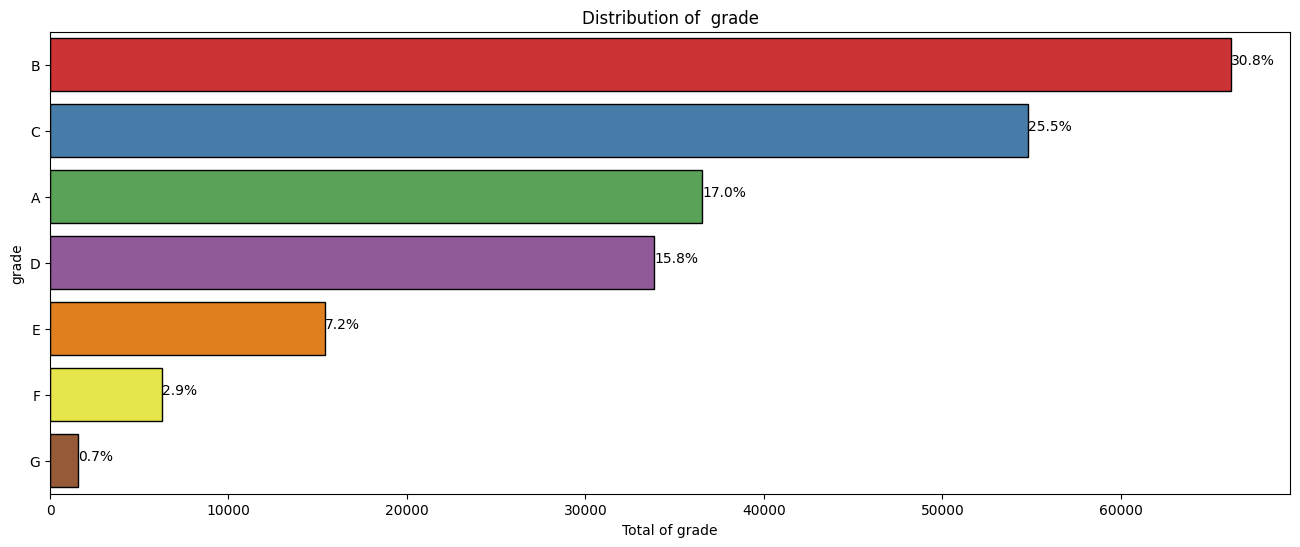

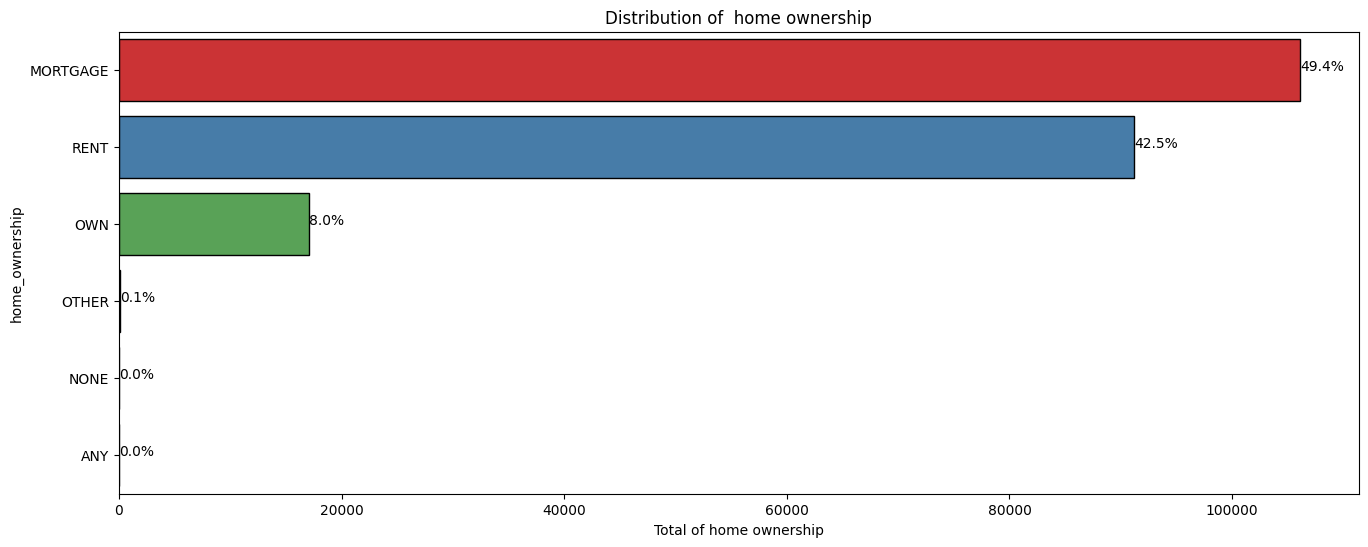

In [45]:
plt.figure(figsize = (16, 6))
ax = sns.countplot(y = 'grade', 
                   data = df,
                   palette = "Set1",
                   edgecolor = "black",
                   order = df['grade'].value_counts().index)
total = len(df['grade'])

for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_width()/total)
        x = i.get_x() + i.get_width() + 0.02
        y = i.get_y() + i.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Distribution of  grade')
plt.xlabel('Total of grade')

plt.show()

plt.figure(figsize = (16, 6))
axs = sns.countplot(y = 'home_ownership', 
                   data = df,
                   palette = "Set1",
                   edgecolor = "black",
                   order = df['home_ownership'].value_counts().index)
total = len(df['home_ownership'])

for i in axs.patches:
        percentage = '{:.1f}%'.format(100 * i.get_width()/total)
        x = i.get_x() + i.get_width() + 0.02
        y = i.get_y() + i.get_height()/2
        axs.annotate(percentage, (x, y))

plt.title('Distribution of  home ownership')
plt.xlabel('Total of home ownership')

plt.show()

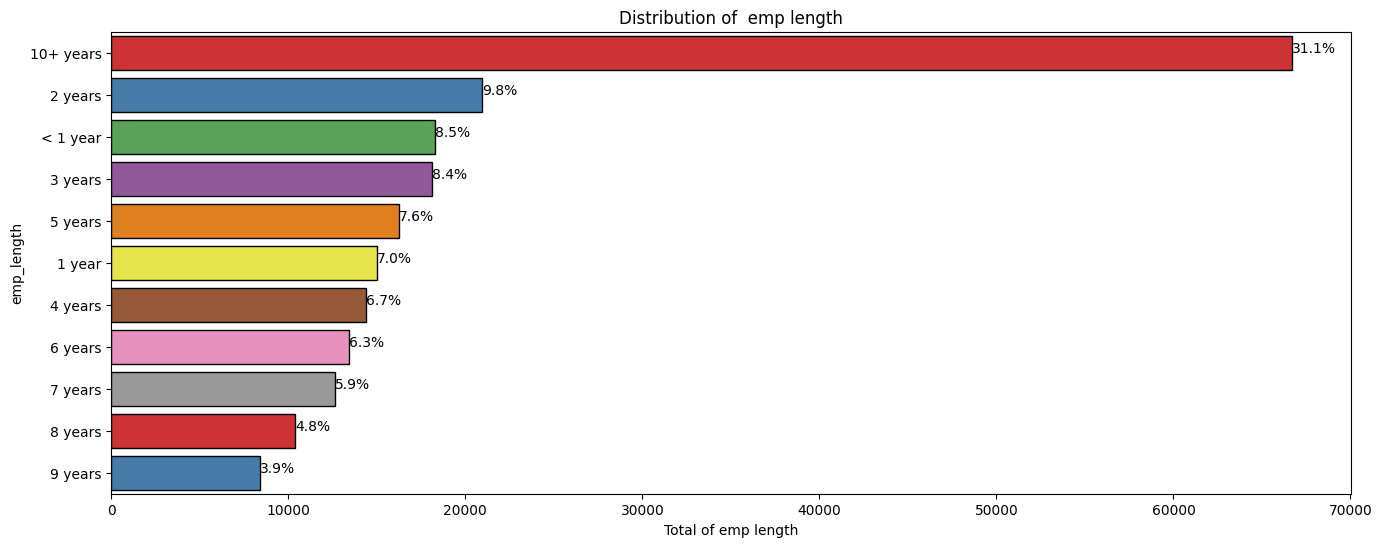

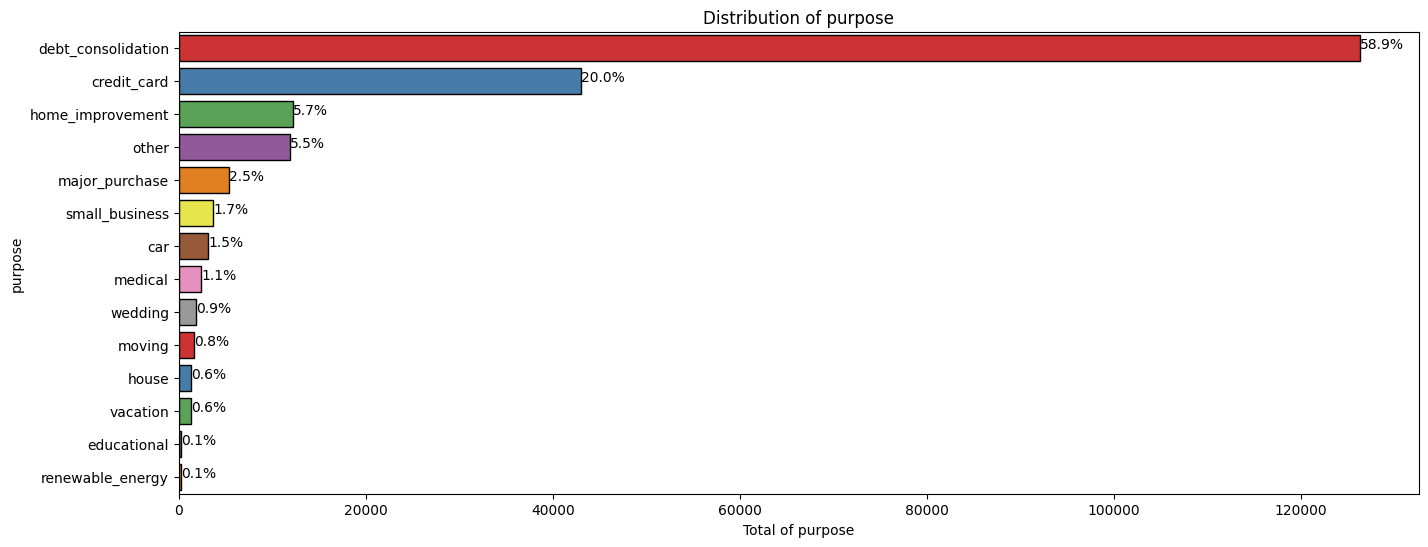

In [46]:
plt.figure(figsize = (16, 6))
ax = sns.countplot(y = 'emp_length', 
                   data = df,
                   palette = "Set1",
                   edgecolor = "black",
                   order = df['emp_length'].value_counts().index)
total = len(df['emp_length'])

for i in ax.patches:
        percentage = '{:.1f}%'.format(100 * i.get_width()/total)
        x = i.get_x() + i.get_width() + 0.02
        y = i.get_y() + i.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Distribution of  emp length')
plt.xlabel('Total of emp length')

plt.show()

plt.figure(figsize = (16, 6))
axs = sns.countplot(y = 'purpose', 
                   data = df,
                   palette = "Set1",
                   edgecolor = "black",
                   order = df['purpose'].value_counts().index)
total = len(df['purpose'])

for i in axs.patches:
        percentage = '{:.1f}%'.format(100 * i.get_width()/total)
        x = i.get_x() + i.get_width() + 0.02
        y = i.get_y() + i.get_height()/2
        axs.annotate(percentage, (x, y))

plt.title('Distribution of purpose')
plt.xlabel('Total of purpose')

plt.show()

If a categorical column has too many unique values, the model will most likely catch noise or irrelevant patterns, thereby increasing the possibility of overfitting.

So from the information above we can use our intuition to choose which is the most useful categorical features for the machine learning model

In this case i will use :

- grade
- emp_length
- verification_status
- pymnt_plan

In [47]:
df['grade'] = df['grade'].replace(['A','B','C','D','E','F','G'], [6, 5, 4, 3, 2, 1, 0])
df['verification_status'] = df['verification_status'].replace(['Verified','Source Verified','Not Verified'], [2, 1, 0])
df['emp_length'] = df['emp_length'].replace(['10+ years','9 years','8 years','7 years','6 years','5 years','4 years', '3 years', '2 years', '1 year', '< 1 year'], 
                                            [10, 9, 8, 7, 6, 5, 4, 3, 2 , 1, 0])
df['pymnt_plan'] = df['pymnt_plan'].replace(['y','n'], [1, 0])

Combine the second feature filtering as categorical and numeric using for machine learning

In [48]:
selected_categoricalfeat = ['grade', 'emp_length', 'verification_status', 'pymnt_plan']

model_feat = selected_categoricalfeat + selected_numericalfeat
print('column model feat : ', model_feat,'\n')
print('Total all columns : ', len(model_feat))

column model feat :  ['grade', 'emp_length', 'verification_status', 'pymnt_plan', 'annual_inc', 'collection_recovery_fee', 'default', 'dti', 'funded_amnt', 'funded_amnt_inv', 'installment', 'int_rate', 'last_pymnt_amnt', 'loan_amnt', 'open_acc', 'recoveries', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_prncp'] 

Total all columns :  23


Drop/remove columns not feature selection 

In [49]:
for colnames in df:
    if colnames not in model_feat:
      df.drop(labels=[colnames], inplace = True, axis = 1)

In [50]:
df['loan_status'] = loans['loan_status']
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,verification_status,pymnt_plan,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,default,loan_status
0,2500,2500,2500.0,15.27,59.83,4,0,30000.0,1,0,1.00,3.0,1687.0,9.4,4.0,1008.710000,1008.71,456.46,435.17,0.0,0.0,119.66,0.0,0
1,10000,10000,10000.0,13.49,339.31,4,10,49200.0,1,0,20.00,10.0,5598.0,21.0,37.0,12226.302210,12226.30,10000.00,2209.33,0.0,0.0,357.48,0.0,1
2,5000,5000,5000.0,7.90,156.46,6,3,36000.0,1,0,11.20,9.0,7963.0,28.3,12.0,5631.377753,5631.38,5000.00,631.38,0.0,0.0,161.03,0.0,1
3,3000,3000,3000.0,18.64,109.43,2,9,48000.0,1,0,5.35,4.0,8221.0,87.5,4.0,3938.144334,3938.14,3000.00,938.14,0.0,0.0,111.34,0.0,1
4,5375,5375,5350.0,12.69,121.45,5,0,15000.0,2,0,18.08,2.0,9279.0,36.5,3.0,1476.190000,1469.34,673.48,533.42,0.0,0.0,121.45,0.0,0


Drop/remove columns not use modeling

In [51]:
del_colmns = ['collection_recovery_fee', 'recoveries', 'default']
df.drop(columns = del_colmns, axis = 1, inplace = True)

In [52]:
df['loan_status'].value_counts()

1    174994
0     39601
Name: loan_status, dtype: int64

## **Trends Analysis**

In [56]:
df_trends = loans.copy()

In [57]:
def parse_date(x):
    try:
        dt = pd.to_datetime(x, format="%b-%y")
        return pd.Series([dt.strftime("%m"), dt.strftime("%Y")])
    except ValueError:
        return pd.Series(["", ""])

In [58]:
df_trends[["earliest_cr_line_month", "earliest_cr_line_year"]] = df_trends["earliest_cr_line"].apply(parse_date)
df_trends[["last_pymnt_d_month", "last_pymnt_d_year"]] = df_trends["last_pymnt_d"].apply(parse_date)
df_trends[["last_credit_pull_d_month", "last_credit_pull_d_year"]] = df_trends["last_credit_pull_d"].apply(parse_date)
df_trends[["issue_d_month", "issue_d_year"]] = df_trends["issue_d"].apply(parse_date)

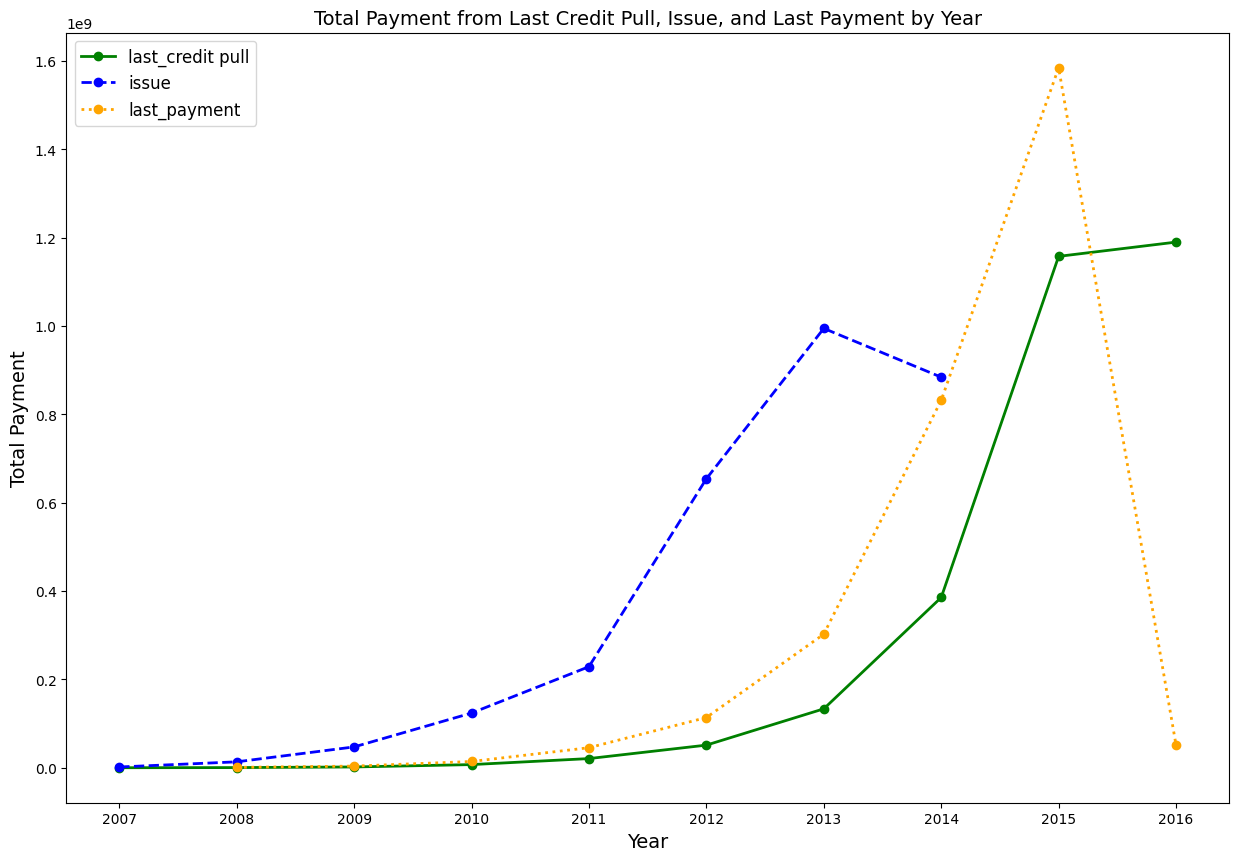

In [59]:
last_credit = df_trends[['last_credit_pull_d_year', 'total_pymnt']].groupby('last_credit_pull_d_year').sum()
issue = df_trends[['issue_d_year', 'total_pymnt']].groupby('issue_d_year').sum()
last_payment = df_trends[['last_pymnt_d_year', 'total_pymnt']].groupby('last_pymnt_d_year').sum()

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.plot(last_credit.index, last_credit.values, label="last_credit pull", linewidth=2, linestyle='-', marker='o',color='green')
ax.plot(issue.index, issue.values, label="issue", linewidth=2, linestyle='--',marker='o', color='blue')
ax.plot(last_payment.index, last_payment.values, label="last_payment", linewidth=2, linestyle=':', marker='o',color='orange')
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Total Payment", fontsize=14)
ax.set_title("Total Payment from Last Credit Pull, Issue, and Last Payment by Year", fontsize=14)
ax.legend(loc='upper left', fontsize=12)
ax.grid(False)

## **Feature Selection**

I use Feature Scaling Min Max Scaler for normalize distribution data

Variable x

In [60]:
scaler = MinMaxScaler()

x = df.iloc[:,:-1]
x = scaler.fit_transform(x)

Variable y

In [ ]:
y = df['loan_status']
y

Split dataset for train and test : 80, 20

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((171676, 20), (42919, 20), (171676,), (42919,))

## **Modeling**

Make definition get best model for machine learning 

In [63]:
def get_models():
    models = dict()
    models["knn"] = KNeighborsClassifier(n_neighbors=5, algorithm="auto")
    models["logistic_regression"] = LogisticRegression(random_state = 0, max_iter= 100, class_weight='balanced')
    models["naive_bayes_MultinomialNB"] = MultinomialNB(fit_prior=True)
    models["naive_bayes_GaussianNB"] = GaussianNB()
    models["decision_tree"] = DecisionTreeClassifier(criterion="gini", splitter="best")
    models["random_forest"] = RandomForestClassifier(criterion="gini")
    return models

Make definition evaluate model for get best accuracy

In [64]:
def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

Show accuracy score and distribution model with graphic

>knn 0.965 (0.001)
>logistic_regression 0.996 (0.000)
>naive_bayes_MultinomialNB 0.816 (0.000)
>naive_bayes_GaussianNB 0.783 (0.004)
>decision_tree 0.998 (0.000)
>random_forest 0.998 (0.000)


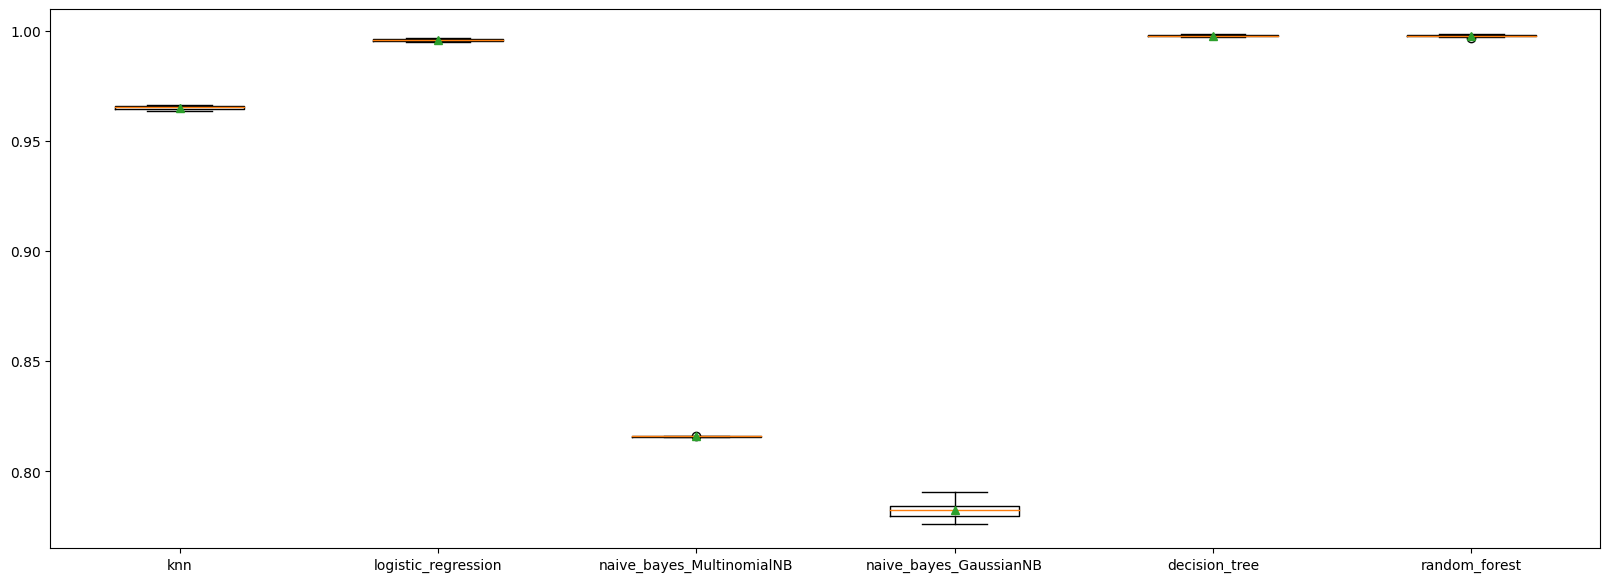

In [65]:
plt.figure(figsize=(20,7))
models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, x, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

After considering the model that has the best and most accurate accuracy, I choose the logistic regression, decision tree, and random forest for models

## **Logistic Regression**

create model

In [66]:
model_log = LogisticRegression(random_state = 0, max_iter= 100, class_weight='balanced')
model_log.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=0)

Make predict model

In [67]:
y_pred_log = model_log.predict(x_test)

Show accuray score Logistic Regression

In [68]:
print(f"acuracy: {accuracy_score(y_test,y_pred_log)}\n")
print(f"{classification_report(y_test, y_pred_log)}")

acuracy: 0.9955264568139984

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7919
           1       1.00      1.00      1.00     35000

    accuracy                           1.00     42919
   macro avg       0.99      0.99      0.99     42919
weighted avg       1.00      1.00      1.00     42919



Confusion matrix Logistic Regression

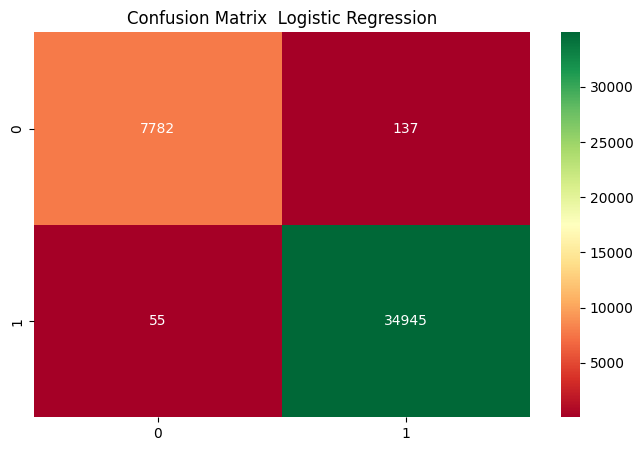

In [69]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_log), annot=True, cmap= "RdYlGn", fmt=".0f", ax=ax)
plt.title("Confusion Matrix  Logistic Regression")
plt.show()

## **Decision Tree**

Create model

In [70]:
model_tree = DecisionTreeClassifier(criterion="gini", splitter="best")
model_tree.fit(x_train, y_train)

DecisionTreeClassifier()

Make predict model

In [71]:
y_pred_tree = model_tree.predict(x_test)

Show accuray score Decision Tree

In [72]:
print(f"acuracy: {accuracy_score(y_test,y_pred_tree)}\n")
print(f"{classification_report(y_test, y_pred_tree)}")

acuracy: 0.9973904331414991

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7919
           1       1.00      1.00      1.00     35000

    accuracy                           1.00     42919
   macro avg       1.00      1.00      1.00     42919
weighted avg       1.00      1.00      1.00     42919



Confusion matrix Decision Tree

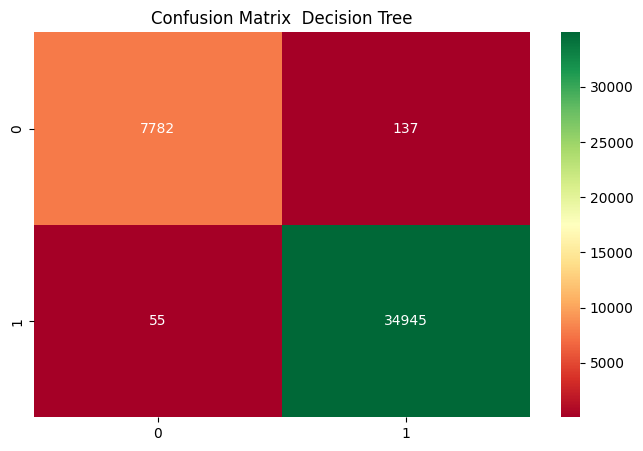

In [73]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_log), annot=True, cmap= "RdYlGn", fmt=".0f", ax=ax)
plt.title("Confusion Matrix  Decision Tree")
plt.show()

## **Random Forest**

Create model

In [74]:
model_forest = RandomForestClassifier(criterion="gini")
model_forest.fit(x_train, y_train)

RandomForestClassifier()

Make predict model

In [75]:
y_pred_forest = model_forest.predict(x_test)

Show accuray score Random Forest

In [76]:
print(f"acuracy: {accuracy_score(y_test,y_pred_forest)}\n")
print(f"{classification_report(y_test, y_pred_forest)}")

acuracy: 0.9976467298865305

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7919
           1       1.00      1.00      1.00     35000

    accuracy                           1.00     42919
   macro avg       1.00      0.99      1.00     42919
weighted avg       1.00      1.00      1.00     42919



Confusion matrix Random Forest

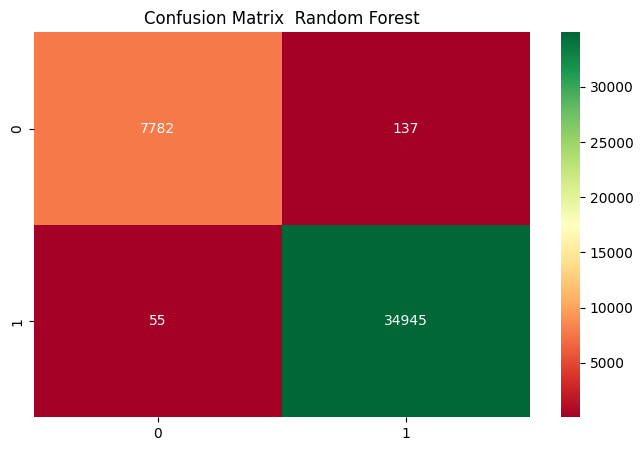

In [77]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_log), annot=True, cmap= "RdYlGn", fmt=".0f", ax=ax)
plt.title("Confusion Matrix  Random Forest")
plt.show()

## **Conclusion**

- Accuracy for each class (bad loans and good loans) is obtained with a very stable value after conducting a training model using oversampling data (the average accuracy for each class is > 70%). Therefore, it can be said that the model can distinguish bad loans from good loans quite effectively when oversampling is used during training.

- Among all the models discussed above, the Decision Tree Classifier produces the best average accuracy results, with an average accuracy value of 99% (bad loan recall = 99% and good loan withdrawals = 100%) and the Random Forest Classifier produces the results the same best average accuracy, with an average accuracy value of 99% (bad loan recall = 99% and good loan withdrawals = 100%). The accuracy scores of the two models are the same, so I chose the Decison Tree Classifier model because it is computationally faster. Recall is calculated by dividing the "positive" number by the accurately anticipated "positive" number. This shows that the model accurately predicts 100% of total good loans and 99% of total bad loans.